<a href="https://colab.research.google.com/github/segnig/Financial-Inclusion-in-Africa/blob/main/eda_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
FILE_PATH = "/content/drive/MyDrive/Data Science/financial-inclusion-in-africa/"

TRAIN_PATH = "Train.csv"
TEST_PATH = "Test.csv"

VARIABLE_DEFINITIONS_PATH = "VariableDefinitions.csv"
SAMPLE_SUBMISSION_PATH = "SampleSubmission.csv"


## Libraries Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset to DataFrame

In [4]:
train = pd.read_csv(FILE_PATH + TRAIN_PATH)
test = pd.read_csv(FILE_PATH + TEST_PATH)

variable_definitions = pd.read_csv(FILE_PATH + VARIABLE_DEFINITIONS_PATH)
sample_submission = pd.read_csv(FILE_PATH + SAMPLE_SUBMISSION_PATH)

# Train DataSet

In [5]:
# How many features and their data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


# Data wrangling Function

In [129]:
def wrangle(file_path):

    # data loading
    df_copy = pd.read_csv(file_path)


    # Inflaction rate in 2019
    inflaction_rate = {"Kenya": 0.0524, "Tanzania": 0.0346, "Rwanda": 0.0335, "Uganda": 0.0286}

    # add new feature `inflation_rate_2019`
    df_copy["inflation_rate_2019"] = df_copy["country"].map(inflaction_rate)


    # Education level
    high_level_edu = set(["Tertiary education", "Secondary education", "Vocational/Specialised training"])

    # mobile_banking = education_level + cellphone_level + location_type
    df_copy["mobile_banking"] = (
        df_copy["education_level"].isin(high_level_edu)
        & (df_copy["cellphone_access"] == "Yes")
        & (df_copy["location_type"] == "Urban")
    )

    # job type
    other_job_type = set(['Dont Know/Refuse to answer', 'Farming and Fishing', 'Informally employed', 'No Income', 'Remittance Dependent', 'Self employed', "Other Income"])

    # if job type in other_job_type it other else as it is
    df_copy["job_type"] = df_copy["job_type"].apply(lambda x: "Other" if x in other_job_type else x)

    # marital status
    df_copy["marital_status"] = df_copy["marital_status"].apply(lambda x: x if x == "Married/Living together" else "Other")


    # dropped features
    dropped_feature = ["year", "relationship_with_head"]

    return df_copy


In [130]:
train = wrangle(FILE_PATH + TRAIN_PATH)

## Banking the Unbanked: How Country Shapes Financial Access in Africa?

In [73]:
# How much data is form each country?
train['country'].value_counts(normalize=True).round(2)

,proportion
country,
Rwanda,0.37
Tanzania,0.28
Kenya,0.26
Uganda,0.09


The dataset predominantly represents four East African countries, with the largest proportion of data `37%` originating from `Rwanda`. `Tanzania` contributes `28%` of the data, followed closely by `Kenya` with `26%`. `Uganda` accounts for the remaining `9%`. This distribution highlights a strong focus on Rwanda while ensuring significant representation from other key East African nations, providing a comprehensive regional perspective on financial inclusion trend

In [10]:
train[train["bank_account"] == "Yes"]["country"].value_counts(normalize=True)

,proportion
country,
Kenya,0.459239
Rwanda,0.302838
Tanzania,0.183273
Uganda,0.054650


In [12]:
train[train["bank_account"] == "No"]["country"].value_counts(normalize=True)

,proportion
country,
Rwanda,0.382545
Tanzania,0.297497
Kenya,0.224965
Uganda,0.094993


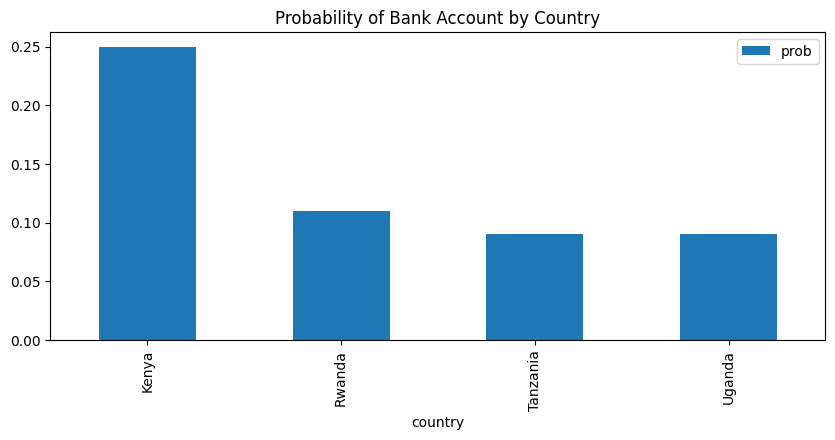

In [24]:
# The probability across the countries have bank_account
prob_country_bank_account = train.groupby("country")["bank_account"].value_counts(normalize=True).round(2)

prob_country_bank_account = prob_country_bank_account.reset_index(name="prob").set_index("country")

prob_country_bank_account[prob_country_bank_account["bank_account"] == "Yes"].plot(kind="bar", title="Probability of Bank Account by Country", figsize=(10, 4));

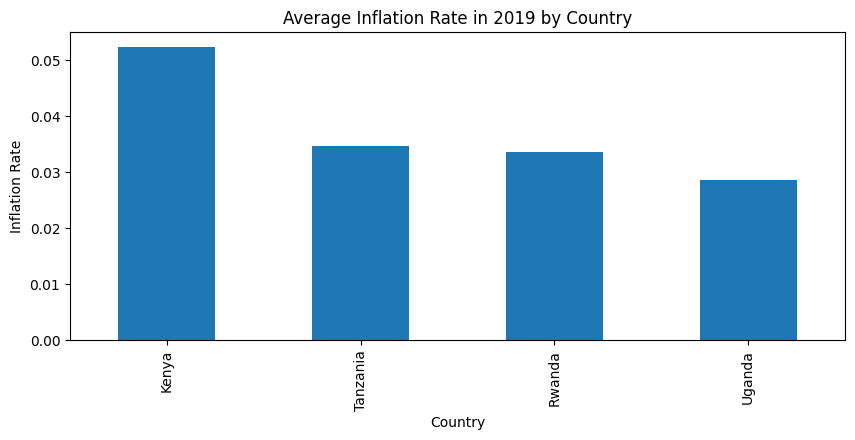

In [37]:
train.groupby("country")["inflation_rate_2019"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10, 4))
plt.title("Average Inflation Rate in 2019 by Country");
plt.ylabel("Inflation Rate");
plt.xlabel("Country");

In [25]:
train["year"].unique()

array([2018, 2016, 2017])

# Unlocking Financial Inclusion: Exploring the Impact of Year and Country on Bank Account Ownership

In [27]:
train.groupby("year")[["bank_account", "country"]].value_counts(normalize=True).round(2)


year  bank_account  country 
2016  No            Rwanda      0.89
      Yes           Rwanda      0.11
2017  No            Tanzania    0.91
      Yes           Tanzania    0.09
2018  No            Kenya       0.56
                    Uganda      0.24
      Yes           Kenya       0.19
                    Uganda      0.02
Name: proportion, dtype: float64

## Tracking Financial Access: How Year and Country Shape Bank Account Ownership Trends

| Year | Bank Account | Country  | Proportion |
|------|--------------|----------|------------|
| 2016 | No           | Rwanda   | 0.89       |
| 2016 | Yes          | Rwanda   | 0.11       |
| 2017 | No           | Tanzania | 0.91       |
| 2017 | Yes          | Tanzania | 0.09       |
| 2018 | No           | Kenya    | 0.56       |
| 2018 | No           | Uganda   | 0.24       |
| 2018 | Yes          | Kenya    | 0.19       |
| 2018 | Yes          | Uganda   | 0.02       |

Year feature does not have relation with out target vector.

## Bridging the Gap: Exploring Mobile Access Across Urban and Rural Locations

In [38]:
train["cellphone_access"].value_counts(normalize=True)

,proportion
cellphone_access,
Yes,0.741966
No,0.258034


In [39]:
train["location_type"].value_counts(normalize=True)

,proportion
location_type,
Rural,0.609718
Urban,0.390282


In [76]:
# let say Urban + cellphone_access = mobile bank
(train["cellphone_access"] == "Yes") & (train["location_type"] == "Urban")

,0
0,False
1,False
2,True
3,False
4,False
...,...
23519,False
23520,False
23521,False
23522,True


In [44]:
train.groupby("cellphone_access")["bank_account"].value_counts(normalize=True)

cellphone_access  bank_account
No                No              0.982867
                  Yes             0.017133
Yes               No              0.816203
                  Yes             0.183797
Name: proportion, dtype: float64

In [45]:
train.groupby("location_type")["bank_account"].value_counts(normalize=True)


location_type  bank_account
Rural          No              0.883497
               Yes             0.116503
Urban          No              0.821261
               Yes             0.178739
Name: proportion, dtype: float64

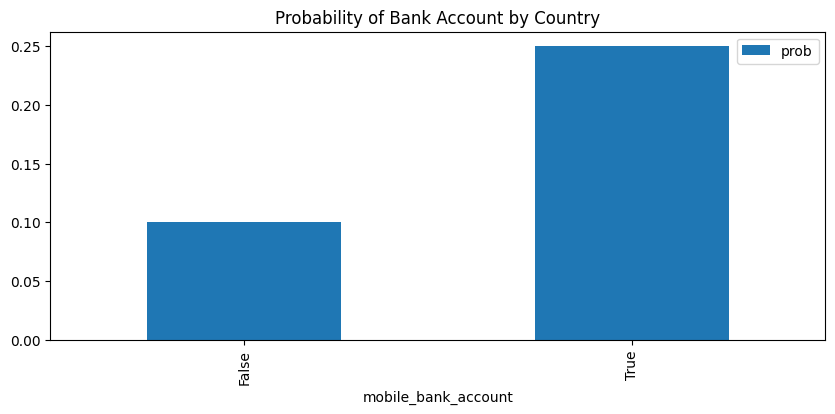

In [49]:
prob_country_bank_account = train.groupby("mobile_bank_account")["bank_account"].value_counts(normalize=True).round(2)

prob_country_bank_account = prob_country_bank_account.reset_index(name="prob").set_index("mobile_bank_account")

prob_country_bank_account[prob_country_bank_account["bank_account"] == "Yes"].plot(kind="bar", title="Probability of Bank Account by Country", figsize=(10, 4));

# education Level

In [52]:
train["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [79]:
high_level_edu = set(["Tertiary education", "Secondary education", "Vocational/Specialised training"])

# mobile_banking = education_level + cellphone_level + location_type
train["mobile_banking"] = (
    train["education_level"].isin(high_level_edu)
    & (train["cellphone_access"] == "Yes")
    & (train["location_type"] == "Urban")
)

In [80]:
train.groupby("mobile_banking")["bank_account"].value_counts(normalize=True)

mobile_banking  bank_account
False           No              0.897104
                Yes             0.102896
True            No              0.554231
                Yes             0.445769
Name: proportion, dtype: float64

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23524 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   bank_account            23524 non-null  object 
 4   location_type           23524 non-null  object 
 5   cellphone_access        23524 non-null  object 
 6   household_size          23524 non-null  int64  
 7   age_of_respondent       23524 non-null  int64  
 8   gender_of_respondent    23524 non-null  object 
 9   relationship_with_head  23524 non-null  object 
 10  marital_status          23524 non-null  object 
 11  education_level         23524 non-null  object 
 12  job_type                23524 non-null  object 
 13  inflation_rate_2019     23524 non-null  float64
 14  mobile_banking          23524 non-null

## Job Type

In [82]:
train["job_type"].value_counts(normalize=True)

,proportion
job_type,
Self employed,0.273635
Informally employed,0.237927
Farming and Fishing,0.231296
Remittance Dependent,0.107422
Other Income,0.045911
Formally employed Private,0.044848
No Income,0.026654
Formally employed Government,0.016451
Government Dependent,0.010500


In [84]:
train_job_type = train.groupby("job_type")["bank_account"].value_counts(normalize=True).reset_index(name="prob").set_index("job_type")

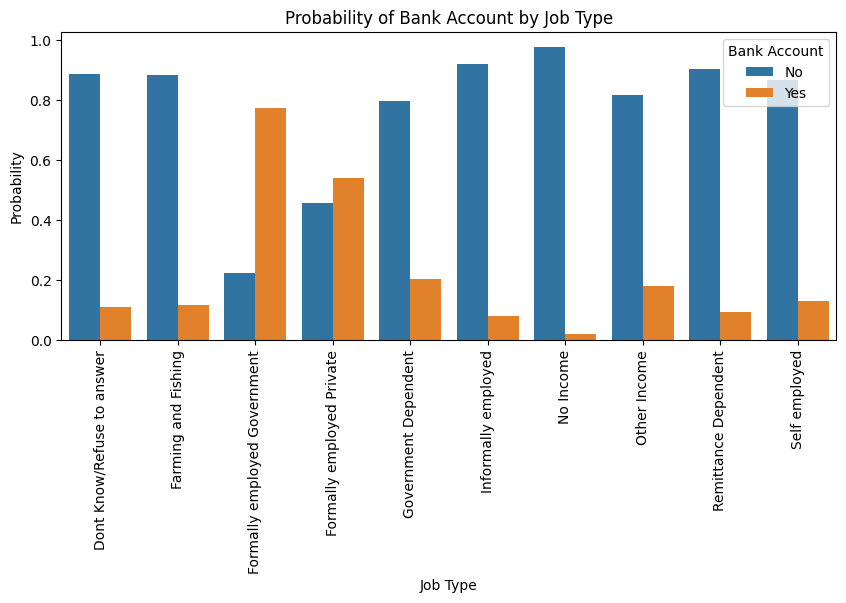

In [91]:
sns.barplot(data=train_job_type, x=train_job_type.index, y="prob", hue="bank_account")

fig = plt.gcf()
fig.set_size_inches(10, 4)

plt.title("Probability of Bank Account by Job Type");
plt.xlabel("Job Type");
plt.ylabel("Probability");
plt.legend(title="Bank Account");
plt.xticks(rotation=90);

In [105]:
train_job_type = train.groupby("job_type")["bank_account"].value_counts(normalize=True).reset_index(name="prob").set_index("job_type")
mask_job_type = (train_job_type["bank_account"] == "Yes") & (train_job_type["prob"] <= 0.2)
other_job_type = train_job_type[mask_job_type].index.to_list()

other_job_type

['Dont Know/Refuse to answer',
 'Farming and Fishing',
 'Informally employed',
 'No Income',
 'Remittance Dependent',
 'Self employed']

In [111]:
train.groupby("job_type")["bank_account"].value_counts(normalize=True)

job_type                      bank_account
Formally employed Government  Yes             0.775194
                              No              0.224806
Formally employed Private     Yes             0.541232
                              No              0.458768
Government Dependent          No              0.797571
                              Yes             0.202429
Other                         No              0.890497
                              Yes             0.109503
Name: proportion, dtype: float64

# Gender response

In [112]:
train["gender_of_respondent"].value_counts(normalize=True)

,proportion
gender_of_respondent,
Female,0.589908
Male,0.410092


In [113]:
train.groupby("gender_of_respondent")["bank_account"].value_counts(normalize=True)

gender_of_respondent  bank_account
Female                No              0.893205
                      Yes             0.106795
Male                  No              0.810304
                      Yes             0.189696
Name: proportion, dtype: float64

# Maritual Status

In [114]:
train["marital_status"].value_counts(normalize=True)

,proportion
marital_status,
Married/Living together,0.456938
Single/Never Married,0.339356
Widowed,0.115116
Divorced/Seperated,0.088250
Dont know,0.000340


In [116]:
train_marital_status = train.groupby("marital_status")["bank_account"].value_counts(normalize=True).reset_index(name="prob").set_index("marital_status")

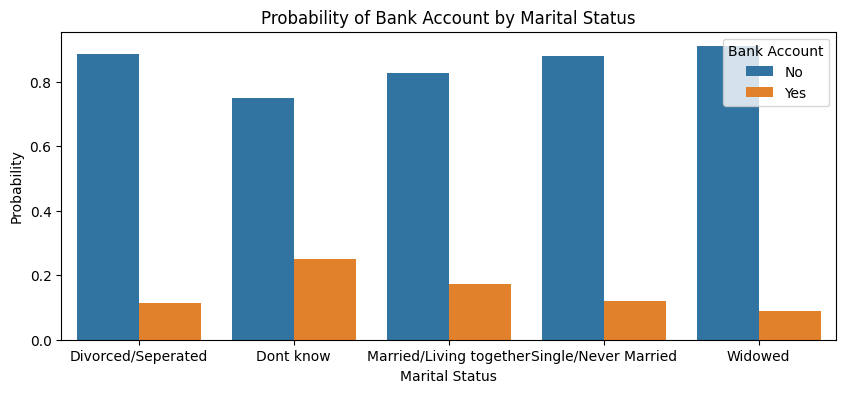

In [118]:
sns.barplot(data=train_marital_status, x=train_marital_status.index, y="prob", hue="bank_account")

fig = plt.gcf()
fig.set_size_inches(10, 4)

plt.title("Probability of Bank Account by Marital Status");
plt.xlabel("Marital Status");
plt.ylabel("Probability");
plt.legend(title="Bank Account");

In [119]:
train_marital_status[train_marital_status["bank_account"] == "Yes"]

,bank_account,prob
marital_status,,
Divorced/Seperated,Yes,0.112717
Dont know,Yes,0.250000
Married/Living together,Yes,0.173598
Single/Never Married,Yes,0.121007
Widowed,Yes,0.090103


High Cardinality to low Cardinality

if `marital_status` is not `Married/Living together` categorize to `Other`


# Releationship with head

In [124]:
train["relationship_with_head"].value_counts(normalize=True)

,proportion
relationship_with_head,
Head of Household,0.545443
Spouse,0.277164
Child,0.094754
Parent,0.046166
Other relative,0.028397
Other non-relatives,0.008077


In [125]:
train_head_rel = train.groupby("relationship_with_head")["bank_account"].value_counts(normalize=True).reset_index(name="prob").set_index("relationship_with_head")

In [126]:
train_head_rel

,bank_account,prob
relationship_with_head,,
Child,No,0.913414
Child,Yes,0.086586
Head of Household,No,0.822851
Head of Household,Yes,0.177149
Other non-relatives,No,0.894737
Other non-relatives,Yes,0.105263
Other relative,No,0.901198
Other relative,Yes,0.098802
Parent,No,0.940147


In [127]:
train_head_rel[train_head_rel["bank_account"] == "Yes"]

,bank_account,prob
relationship_with_head,,
Child,Yes,0.086586
Head of Household,Yes,0.177149
Other non-relatives,Yes,0.105263
Other relative,Yes,0.098802
Parent,Yes,0.059853
Spouse,Yes,0.106595


In [128]:
train_head_rel[train_head_rel["bank_account"] == "No"]

,bank_account,prob
relationship_with_head,,
Child,No,0.913414
Head of Household,No,0.822851
Other non-relatives,No,0.894737
Other relative,No,0.901198
Parent,No,0.940147
Spouse,No,0.893405


Relationship between "Relationship with Head" and "Bank Account Ownership" is not significant, it suggests that the status of an individual in the household (e.g., head, spouse, child, etc.) does not strongly influence whether they have a bank account.

# Gender and Age

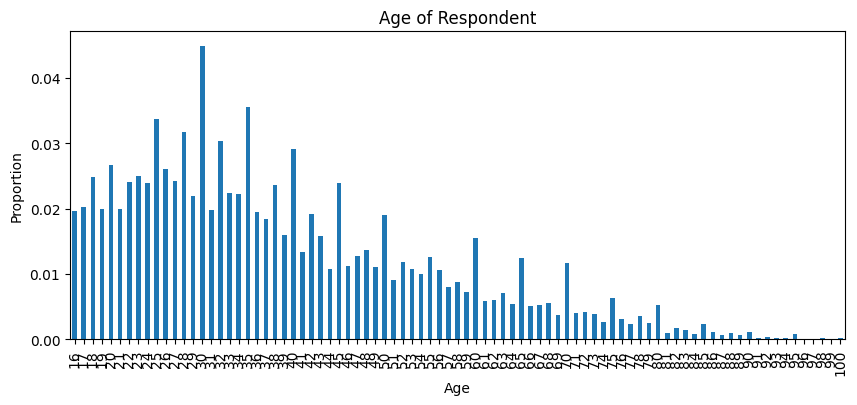

In [139]:
train["age_of_respondent"].value_counts(normalize=True).sort_index().plot(kind="bar", figsize=(10, 4))
plt.title("Age of Respondent");
plt.xlabel("Age");
plt.ylabel("Proportion");

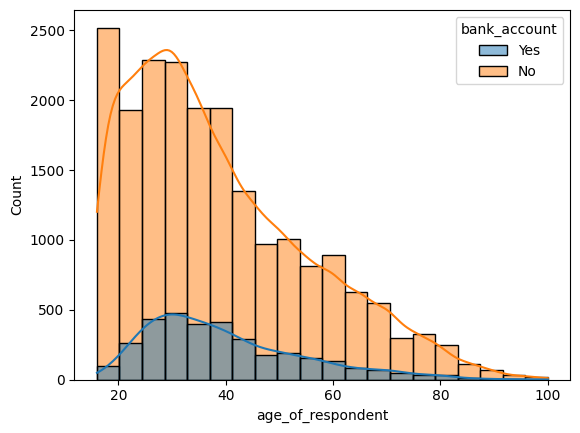

In [146]:
sns.histplot(data=train, x="age_of_respondent", hue="bank_account", kde=True, bins=20);

In [148]:
train_age = train.groupby("age_of_respondent")["bank_account"].value_counts(normalize=True).reset_index(name="prob").set_index("age_of_respondent")

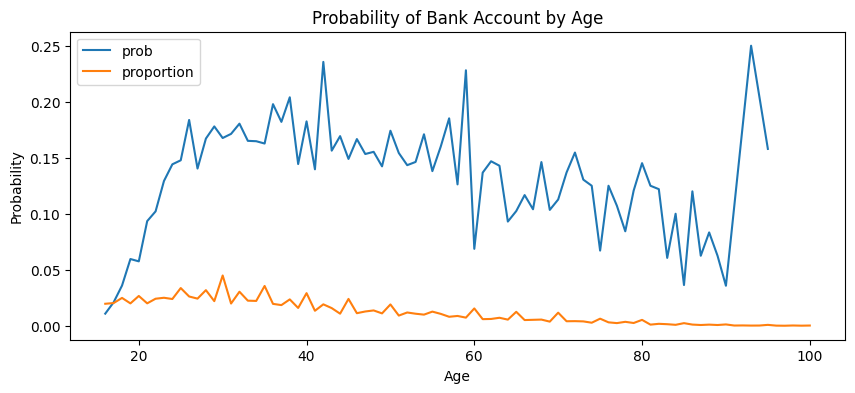

In [156]:
train_age[train_age["bank_account"] == "Yes"].plot(figsize=(10, 4))
train["age_of_respondent"].value_counts(normalize=True).sort_index().plot(figsize=(10, 4), legend="% data")
plt.title("Probability of Bank Account by Age");
plt.xlabel("Age");
plt.ylabel("Probability");